In [1]:
import seaborn as sns; sns.set()
%matplotlib inline
import numpy
import scipy

In [2]:
import intake

In [9]:
cat = intake.open_catalog('us_wells.yml')

cat.producing_well_locations_by_ticker_and_state(ticker='EOG', state='TX').read()

,api,latitude_surface_hole,longitude_surface_hole
0,42013018840000,28.873200,-98.594885
1,42009417870000,33.649650,-98.497548
2,42003393990000,32.174367,-102.513758
3,42009418160000,33.648406,-98.495445
4,42013018850000,28.871411,-98.589418
5,42013030720000,28.878194,-98.613142
6,42013031040000,28.880039,-98.611911
7,42013300070000,28.876474,-98.618063
8,42013342710000,28.954252,-98.333136
9,42013340970000,28.870632,-98.602636


In [1]:
from intake import cat
#import hvplot.intake
#list(cat)

/Users/john/miniconda3/envs/Daytum/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
import intake
import hvplot.intake

In [3]:
cat = intake.open_catalog('petrophysical.yml')
list(cat)

['poro_perm']

In [6]:
cat.poro_perm.plot.my_scatter(x='porosity', y='permeability')

:Scatter   [porosity]   (permeability)

In [26]:
df = cat.well_location_by_ticker_and_state(state='NM', ticker='XOM').read()
df.index[df['api'].isin(['30015036910000','30015047340000'])].tolist()

[0, 1]

In [23]:
df1 = source.read(); 
df2 = df1.set_index(['api']).loc[['33025011950000','33007016320000']]
df1.values

array([['33025011950000', 47.732472, -102.356312],
       ['33007016320000', 47.088015, -103.244705],
       ['33023008930000', 48.681011, -102.952146],
       ..., 
       ['33053015970000', 47.779519, -103.469084],
       ['33007013660000', 47.102537, -103.40712],
       ['33025034440000', 47.588886, -102.882468]], dtype=object)

In [9]:
tickers[tickers != 'None'].tolist()

NameError: name 'tickers' is not defined

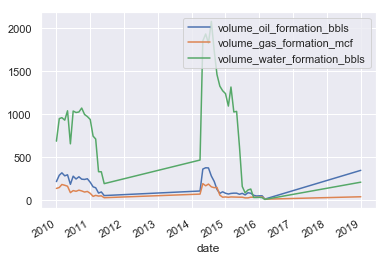

In [8]:
df1.set_index(['api', 'date']).loc['33007000140000'].plot()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [16]:
import matplotlib.pyplot as plt

df1 = cat.production_by_api(api='30015036910000').read().set_index(['date'])['volume_oil_formation_bbls']

In [58]:
class ProductionPlot(object):
    
    def __init__(self, ylabel='Oil (bbl)'):

        self.setup_date_plot(ylabel)
    
    
    def setup_date_plot(self, ylabel):

        self.fig  = plt.figure(figsize=(12,10))
        
        self.ax = self.fig.add_axes([0.08,.6,.5,.4])
        self.ax.set_ylabel(ylabel)
        
        self.color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
        self.color_cycle_index = 1
        
        return 
    
    def add_plot(self, df, api, default_linestyle='', default_marker='o'):
        
        df.plot(ax=self.ax, linestyle=default_linestyle, marker=default_marker, color=self.color_cycle[self.color_cycle_index], label="API: {}".format(api))

        # Put a legend to the right of the current axis
        self.ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5)
        self.ax.set_xlabel('Date')
        
        self.color_cycle_index += 1
        if self.color_cycle_index == (len(self.color_cycle) - 1):
            self.color_cycle_index = 1
            
        
        
    def add_model_plot(self, df, api, default_linestyle='-', default_marker=''):
    
        days = np.insert(np.cumsum((df.index[1:]- df.index[:-1])), [0], [0]).days.values
        
        model = lambda t, q_i, D, b: q_i / (1 + b * D * t) ** (1 / b)
        
        np.seterr(all='ignore')
        parameters, _ = scipy.optimize.curve_fit(model, days, df.values)#, bounds=([-np.inf, -np.inf, np.finfo('double').eps], [np.inf, np.inf, 2]))
    
        self.ax.plot(df.index.values, model(days, *parameters), linestyle=default_linestyle, marker=default_marker, 
                     color=self.color_cycle[self.color_cycle_index - 1], label="API: {}".format(api))
        
        self.ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5)

/Users/john/miniconda3/envs/Daytum/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


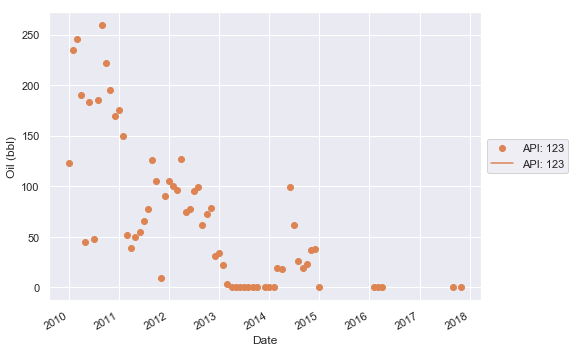

In [59]:
import numpy as np
p1 = ProductionPlot('Oil (bbl)')

p1.add_plot(df1,'123')
p1.add_model_plot(df1,'123')

In [69]:
x = np.sort(np.array(['OH', 'MI', 'WV', 'CA', 'ND', 'BC', 'KS', 'MT', 'UT', 'PA', 'AR', 'LA', 'WY', 'OK', 'TX', 'CO', 'NM', 'GM']))

In [70]:
print(x)

['AR' 'BC' 'CA' 'CO' 'GM' 'KS' 'LA' 'MI' 'MT' 'ND' 'NM' 'OH' 'OK' 'PA' 'TX'
 'UT' 'WV' 'WY']


In [10]:
cat.poro_perm.read()

,porosity,permeability
0,0.105,47.46
1,0.105,29.75
2,0.112,37.56
3,0.085,18.38
4,0.138,75.03
5,0.100,30.69
6,0.115,46.22
7,0.116,48.75
8,0.120,54.97
9,0.117,52.73


In [1]:
import intake
intake.gui

Intake GUI instance: to get widget to display, you must install ipy/jupyter-widgets, run in a notebook and, in the case of jupyter-lab, install the jlab extension.